In [1]:
import tensorflow as tf

# Load the Fashion MNIST dataset
fmnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

# Normalize the pixel values
training_images = training_images / 255.0
test_images = test_images / 255.0

In [2]:
# Define the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# Setup training parameters
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
print(f'\nMODEL TRAINING:')
model.fit(training_images, training_labels, epochs=5)

# Evaluate on the test set
print(f'\nMODEL EVALUATION:')
test_loss = model.evaluate(test_images, test_labels)


MODEL TRAINING:
Epoch 1/5
1875/1875 [==============================] - 2s 775us/step - loss: 0.5016 - accuracy: 0.8249
Epoch 2/5
1875/1875 [==============================] - 1s 707us/step - loss: 0.3773 - accuracy: 0.8638
Epoch 3/5
1875/1875 [==============================] - 1s 665us/step - loss: 0.3365 - accuracy: 0.8777
Epoch 4/5
1875/1875 [==============================] - 1s 720us/step - loss: 0.3129 - accuracy: 0.8840
Epoch 5/5
1875/1875 [==============================] - 1s 692us/step - loss: 0.2953 - accuracy: 0.8924

MODEL EVALUATION:
313/313 [==============================] - 0s 568us/step - loss: 0.3635 - accuracy: 0.8671


# CNN

In [3]:
# Define the model
model = tf.keras.models.Sequential([
    # Add convolutions and max pooling
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # Add the same layers as before
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Print the model summary
model.summary()

# Use same settings
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
print(f'\nMODEL TRAINING:')
model.fit(training_images, training_labels, epochs=5)

# Evaluate on the test set
print(f'\nMODEL EVALUATION:')
test_loss = model.evaluate(test_images, test_labels)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 800)               0         
                                                                 
 dense_2 (Dense)             (None, 128)              

# Visualizing the Convolutions and Pooling

In [4]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


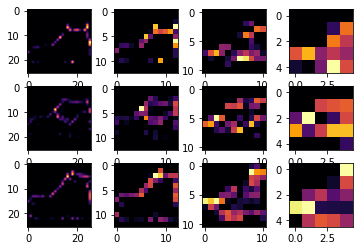

In [5]:
import matplotlib.pyplot as plt

f, axarr = plt.subplots(3,4)

FIRST_IMAGE=0
SECOND_IMAGE=23
THIRD_IMAGE=28
CONVOLUTION_NUMBER = 1

layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)

for x in range(0,4):
    f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[0,x].grid(False)

    f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[1,x].grid(False)

    f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[2,x].grid(False)

In [6]:
layer_outputs

[<KerasTensor: shape=(None, 26, 26, 32) dtype=float32 (created by layer 'conv2d')>,
 <KerasTensor: shape=(None, 13, 13, 32) dtype=float32 (created by layer 'max_pooling2d')>,
 <KerasTensor: shape=(None, 11, 11, 32) dtype=float32 (created by layer 'conv2d_1')>,
 <KerasTensor: shape=(None, 5, 5, 32) dtype=float32 (created by layer 'max_pooling2d_1')>,
 <KerasTensor: shape=(None, 800) dtype=float32 (created by layer 'flatten_1')>,
 <KerasTensor: shape=(None, 128) dtype=float32 (created by layer 'dense_2')>,
 <KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense_3')>]

In [9]:
pred = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))

In [10]:
len(pred)

7

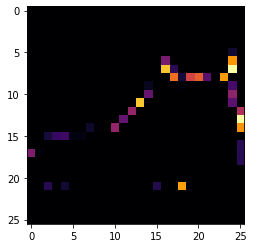

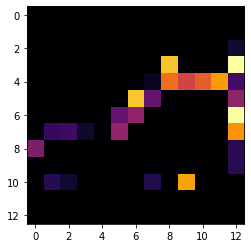

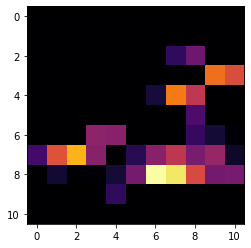

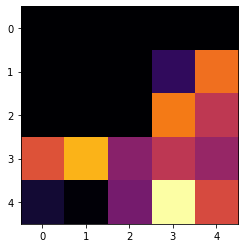

[[0.00000000e+00 0.00000000e+00 3.06900531e-01 3.57453227e-02
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 6.52264655e-02 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.03966512e-01 0.00000000e+00
  1.15317196e-01 0.00000000e+00 0.00000000e+00 3.33687007e-01
  0.00000000e+00 0.00000000e+00 0.00000000e+00 2.00910151e-01
  0.00000000e+00 0.00000000e+00 7.20561817e-02 0.00000000e+00
  0.00000000e+00 0.00000000e+00 3.06900531e-01 3.57453227e-02
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 6.52264655e-02 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.04986437e-01 0.00000000e+00
  1.15317196e-01 0.00000000e+00 0.00000000e+00 3.33687007e-01
  0.00000000e+00 0.00000000e+00 0.00000000e+00 2.01128036e-01
  0.00000000e+00 0.00000000e+00 7.30260909e-02 0.00000000e+00
  0.0000

In [15]:
for i in range(len(pred)):
    if i < 4:
        plt.imshow(pred[i][0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
        plt.grid(False)
        plt.show()
    else:
        print(pred[i])
        print(len(pred[i][0]))

In [17]:
test_images[FIRST_IMAGE].shape

(28, 28)

In [22]:
pred = model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))
pred

array([[1.8869609e-07, 2.9228428e-08, 1.3143388e-08, 7.3017539e-08,
        1.8889802e-08, 3.5100467e-05, 1.9353710e-07, 9.2177826e-04,
        2.0522411e-06, 9.9904054e-01]], dtype=float32)

# exercise

In [30]:
# Define the model
n_filters = 32
model = tf.keras.models.Sequential([
    # Add convolutions and max pooling
    tf.keras.layers.Conv2D(n_filters, (3, 3), padding="same", activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(n_filters, (3, 3), padding="same", activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(n_filters, (3, 3), padding="same", activation='relu'),
    # tf.keras.layers.MaxPooling2D(2, 2),

    # Add the same layers as before
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Print the model summary
model.summary()

# Use same settings
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
print(f'\nMODEL TRAINING:')
model.fit(training_images, training_labels, epochs=5)

# Evaluate on the test set
print(f'\nMODEL EVALUATION:')
test_loss = model.evaluate(test_images, test_labels)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 7, 7, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 7, 7, 32)          9248      
                                                                 
 flatten_9 (Flatten)         (None, 1568)             

* フィルタ数
  * 16 : loss: 0.3020 - accuracy: 0.8890
  * 32 : loss: 0.2668 - accuracy: 0.9058
  * 64 : loss: 0.2545 - accuracy: 0.9082

* 構造
  * (conv2d - pooling) x 1 : loss: 0.2461 - accuracy: 0.9154
  * (conv2d - pooling) x 2 : loss: 0.2668 - accuracy: 0.9058
  * (conv2d - pooling) x 3 : loss: 0.3536 - accuracy: 0.8753
  * (conv2d(pad) - pooling) x 2 + conv2d(pad) : loss: 0.2346 - accuracy: 0.9143

In [31]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') >= 0.9): # Experiment with changing this value
            print("\nReached 90% accuracy so cancelling training!")
            self.model.stop_training = True

callbacks = myCallback()

# Define the model
n_filters = 32
model = tf.keras.models.Sequential([
    # Add convolutions and max pooling
    tf.keras.layers.Conv2D(n_filters, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(n_filters, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    # Add the same layers as before
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Print the model summary
model.summary()

# Use same settings
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
print(f'\nMODEL TRAINING:')
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])

# Evaluate on the test set
print(f'\nMODEL EVALUATION:')
test_loss = model.evaluate(test_images, test_labels)

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 5, 5, 32)         0         
 g2D)                                                            
                                                                 
 flatten_10 (Flatten)        (None, 800)               0         
                                                                 
 dense_19 (Dense)            (None, 128)             